# 1. 데이터(PUBG Finish Placement Prediction)
*   출처: https://www.kaggle.com/c/pubg-finish-placement-prediction/data

## 1-1. 데이터 불러오기

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

url = '/content/drive/MyDrive/codestates/p2/train_V2.csv'
df = pd.read_csv(url)

Mounted at /content/drive


In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df.shape

(4446966, 29)

In [ ]:
df.isnull().sum()  #결측치 확인

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
df.duplicated().sum()  #중복된 row 확인

0

In [ ]:
df = df.dropna(axis=0)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


## 1-2. column 설명

* **DBNOs** - 기절시킨 적 플레이어의 수
* **assists** - 이 플레이어가 피해를 입히고 팀 동료에 의해 사망한 플레이어의 수
* **boosts** - 사용한 부스팅 아이템의 수
* **damageDealt** - 팀킬 제외한 총 피해량
* **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수
* **heals** - 사용한 치유 아이템의 수
* **Id** - 플레이어의 아이디
* **killPlace** - 이 매치의 킬 순위
* **killPoints** - 킬 수만의 외부 랭킹
* **killStreaks** - 단기간에 죽은 적의 최대 수
* **kills** - 죽인 적 플레이어의 수
* **longestKill** - 사망 시 사망한 플레이어와의 최장 거리
* **matchDuration** - 매치 시간
* **matchId** - 매치를 식별하는 아이디
* **matchType** - 게임모드를 식별(solo, duo, squad, solo-fpp, duo-fpp, squad-fpp 등)
* **rankPoints** - 플레이어의 Elo 랭킹
* **revives** - 팀원들을 소생시킨 횟수
* **rideDistance** - 차량으로 이동한 총 이동 거리(m 단위)
* **roadKills** - 차에 타고 있을 때의 킬 수
* **swimDistance** - 수영으로 이동한 총 이동거리(m 단위)
* **teamKills** - 팀원을 죽인 횟수
* **vehicleDestroys** - 차량은 파괴한 횟수
* **walkDistance** - 걸어서 이동한 총 이동 거리(m 단위)
* **weaponsAcquired** - 획득한 무기의 수
* **winPoints** - 순위로만 매겨진 랭킹
* **groupId** - 매치내 그룹을 식별하는 ID
* **numGroups** - 매치 안에 데이터가 있는 그룹의 수
* **maxPlace** - 매치 안에서의 제일 마지막 순위
* **winPlacePerc** - 예측의 타겟으로 순위 백분위

# 2. 데이터 전처리

### 2-1. 매치 타입 별 데이터 수 확인 및 예측할 매치타입 결정

In [ ]:
match_type = pd.DataFrame(df['matchType'].value_counts())
match_type.columns = ['count']
match_type

,count
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536761
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


In [ ]:
match_type = match_type[match_type['count']>=100000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


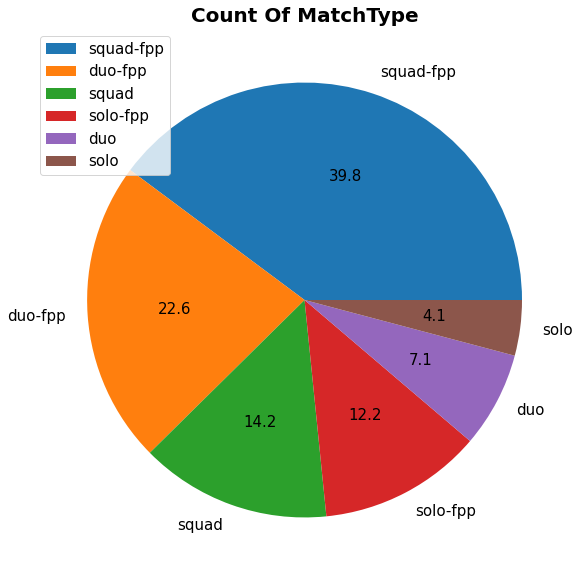

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Count Of MatchType', fontsize=20, fontweight='bold')
plt.pie(match_type,
        labels=match_type.index,
        autopct='%.1f',
        textprops={'fontsize': 15})
plt.legend(loc='upper left',
           fontsize=15)
plt.show()

* 이용자들이 많이 플레이 하는 6개의 매치 타입 별로 순위 예측을 진행

### 2-2 match type 별로 데이터 나누기



In [ ]:
df_squad_fpp = df[df['matchType'] == 'squad-fpp'].reset_index(drop = True)
df_duo_fpp = df[df['matchType'] == 'duo-fpp'].reset_index(drop = True)
df_solo_fpp = df[df['matchType'] == 'solo-fpp'].reset_index(drop = True)

In [ ]:
squad_member = df_squad_fpp.groupby(['groupId'])['Id'].count()
squad_member

groupId
000049feba5c83    3
000073397f671b    3
0000a9f58703c5    3
00011a138e1889    3
000154df50bcec    4
                 ..
ffff97eb7e8f2f    3
ffff984e5bbfd1    2
ffffa1e9873a69    4
ffffebde865cfb    4
ffffec6bb5212a    3
Name: Id, Length: 506161, dtype: int64

In [ ]:
# 팀원 수 확인 -> 스쿼드 모드에서 팀원이 5명 이상인 팀 발견
squad_member_count = squad_member.value_counts().sort_index()
squad_member_count

1      54464
2      61077
3     160158
4     151297
5      37448
6      18035
7      10187
8       5680
9       3210
10      1866
11      1092
12       643
13       427
14       254
15       136
16        75
17        43
18        29
19        18
20         9
21         3
22         3
23         3
24         1
26         1
28         1
31         1
Name: Id, dtype: int64

In [ ]:
# 팀원이 5명 이상인 데이터 삭제
df_squad_fpp = df_squad_fpp.loc[~df_squad_fpp['groupId'].isin(squad_member[squad_member>4].index)].reset_index(drop=True)

In [ ]:
df_squad_member = df_squad_fpp.groupby(['groupId'])['Id'].count().value_counts().sort_index()

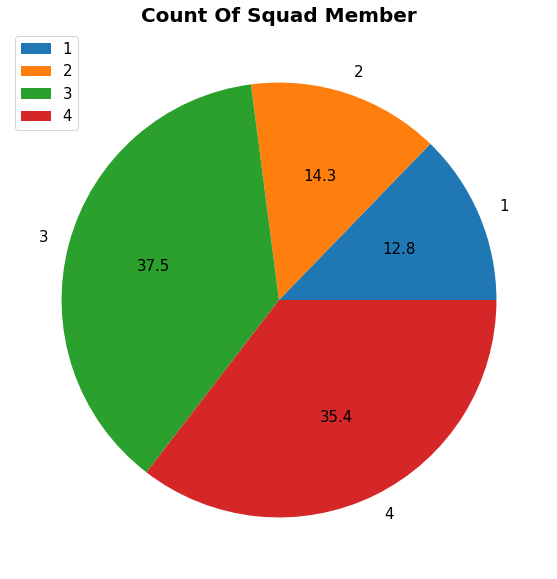

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Count Of Squad Member', fontsize=20, fontweight='bold')
plt.pie(df_squad_member,
        labels=df_squad_member.index,
        autopct='%.1f',
        textprops={'fontsize': 15})
plt.legend(loc='upper left',
           fontsize=15)
plt.show()

In [ ]:
duo_member = df_duo_fpp.groupby(['groupId'])['Id'].count()
duo_member

groupId
00003a54230763    2
000077d5217a7c    2
00009c612cb5dc    2
00009db03ac5d7    2
0000b3a8f7db43    3
                 ..
ffff9a1863466e    2
ffffcdb36377ed    2
ffffd20c7fdf20    2
fffff305a0133d    2
fffff7edfc4050    2
Name: Id, Length: 486491, dtype: int64

In [ ]:
# 팀원 수 확인 -> 듀오 모드에서 팀원이 3명 이상인 팀 발견
duo_member_count = duo_member.value_counts().sort_index()
duo_member_count

1      28076
2     422186
3      24752
4       8860
5       1725
6        590
7        190
8         79
9         19
10         9
12         2
14         1
49         1
72         1
Name: Id, dtype: int64

In [ ]:
# 팀원이 3명 이상인 데이터 삭제
df_duo_fpp = df_duo_fpp.loc[~df_duo_fpp['groupId'].isin(duo_member[duo_member>2].index)].reset_index(drop=True)

In [ ]:
df_duo_member = df_duo_fpp.groupby(['groupId'])['Id'].count().value_counts().sort_index()

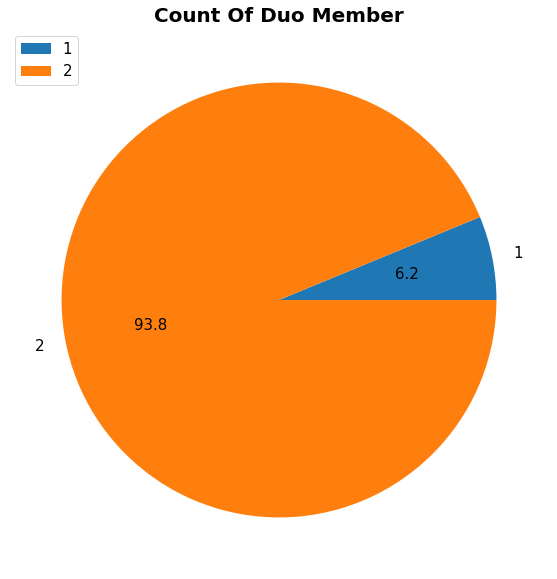

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Count Of Duo Member', fontsize=20, fontweight='bold')
plt.pie(df_duo_member,
        labels=df_duo_member.index,
        autopct='%.1f',
        textprops={'fontsize': 15})
plt.legend(loc='upper left',
           fontsize=15)
plt.show()

In [ ]:
solo_member = df_solo_fpp.groupby(['groupId'])['Id'].count()
solo_member

groupId
000025a09dd1d7    1
00006aa800b4a7    1
00006eda19d504    1
0000909041d5c1    1
0000a174c5bcf4    1
                 ..
ffff7a5f89ef0f    1
ffff90362f5792    1
ffffa2a1cf94c9    1
ffffcf7aa4d8ed    1
fffff32bc7eab9    1
Name: Id, Length: 523457, dtype: int64

In [ ]:
# 팀원 수 확인 -> 듀오 모드에서 팀원이 3명 이상인 팀 발견
solo_member_count = solo_member.value_counts().sort_index()
solo_member_count

1     511998
2      10092
3       1038
4        253
5         62
6         12
7          1
64         1
Name: Id, dtype: int64

In [ ]:
# 팀원이 2명 이상인 데이터 삭제
df_solo_fpp = df_solo_fpp.loc[~df_solo_fpp['groupId'].isin(solo_member[solo_member>1].index)].reset_index(drop=True)

In [ ]:
df_solo_member = df_solo_fpp.groupby(['groupId'])['Id'].count().value_counts().sort_index()

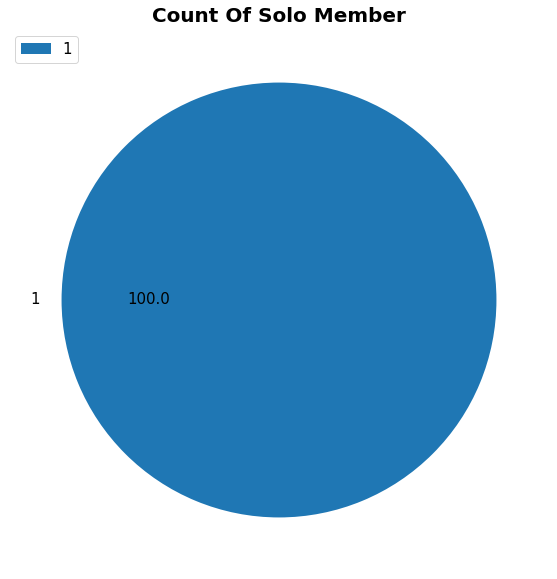

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Count Of Solo Member', fontsize=20, fontweight='bold')
plt.pie(df_solo_member,
        labels=df_solo_member.index,
        autopct='%.1f',
        textprops={'fontsize': 15})
plt.legend(loc='upper left',
           fontsize=15)
plt.show()

### 2-3 feature 추가

In [2]:
# feature engineering

import numpy as np

def preprocessData(df):
  df['numberOfTeamMembers'] = df.groupby(['groupId']).Id.transform('count')    # 팀원 수 컬럼 추가
  df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']   # 총 이동거리 컬럼 추가(m 단위)
  df['headshotKillsPerKills'] = np.where(df["kills"].values == 0 , -1, round(df['headshotKills']/df['kills'],4))  # 킬중에서 헤드샷 킬의 비율(킬이 없으면 -1)
  df['useCar'] = np.where(df['rideDistance'] != 0, '1', '0') # 차를 사용했으면 1, 차를 사용하지 않았으면 0  
  df = df[['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'numberOfTeamMembers','totalDistance',
       'headshotKillsPerKills', 'useCar', 'winPlacePerc']]
  df = df.groupby('groupId').mean()
  return df

In [ ]:
df_squad_fpp = preprocessData(df_squad_fpp)
df_duo_fpp = preprocessData(df_duo_fpp)
df_solo_fpp = preprocessData(df_solo_fpp)

# 3. 데이터 분석

### 3-1 타겟과 특섣들의 상관관계 분석

In [ ]:
import seaborn as sns

def CorrAnalysis(df):
  corr = df.corr()
  # 그림 사이즈 지정
  fig, ax = plt.subplots( figsize=(15,15) )

  # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # 히트맵을 그린다
  sns.heatmap(corr, 
              cmap = 'coolwarm', 
              fmt='.2f',
              annot = True,   # 실제 값을 표시한다
              mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
              linewidths=.5,  # 경계면 실선으로 구분하기
              cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
              vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
            )  
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


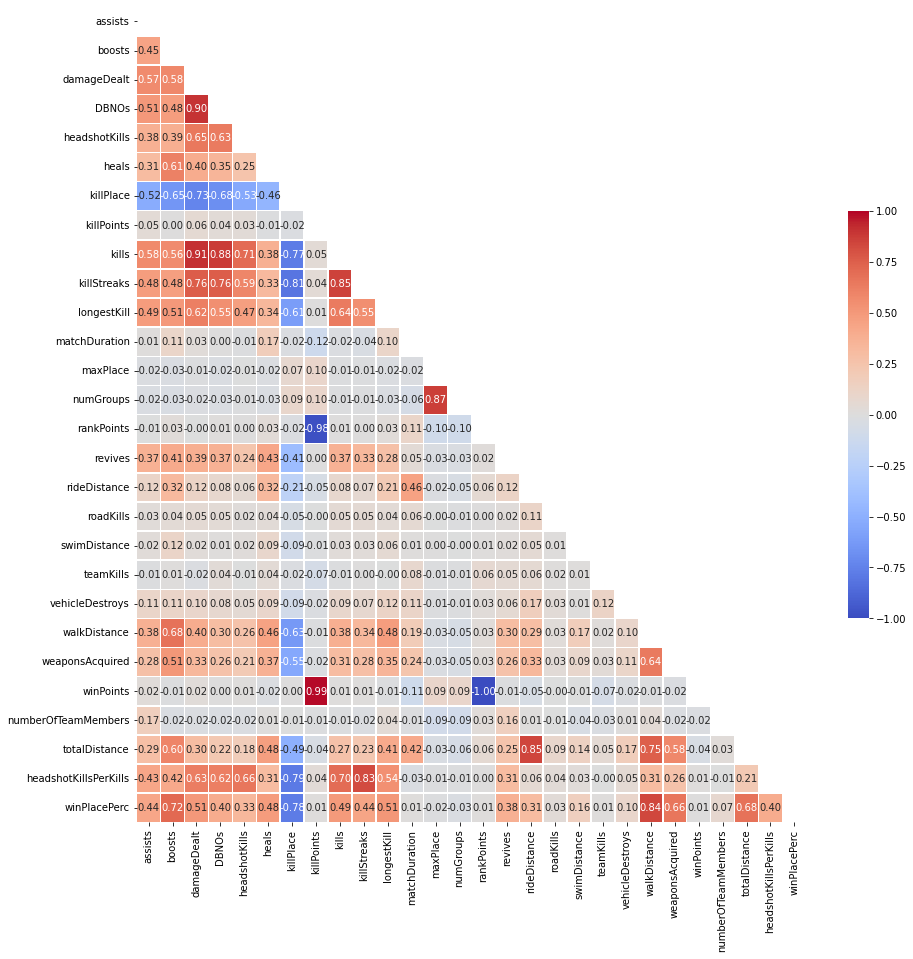

In [ ]:
CorrAnalysis(df_squad_fpp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


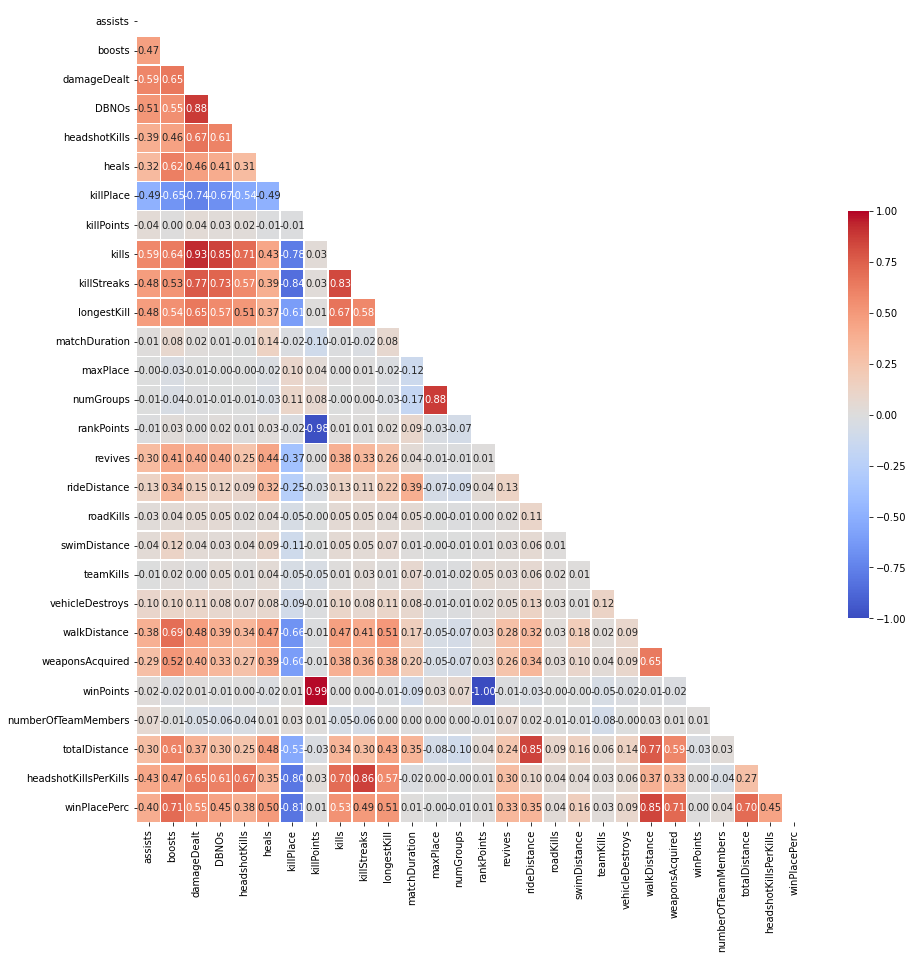

In [ ]:
CorrAnalysis(df_duo_fpp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


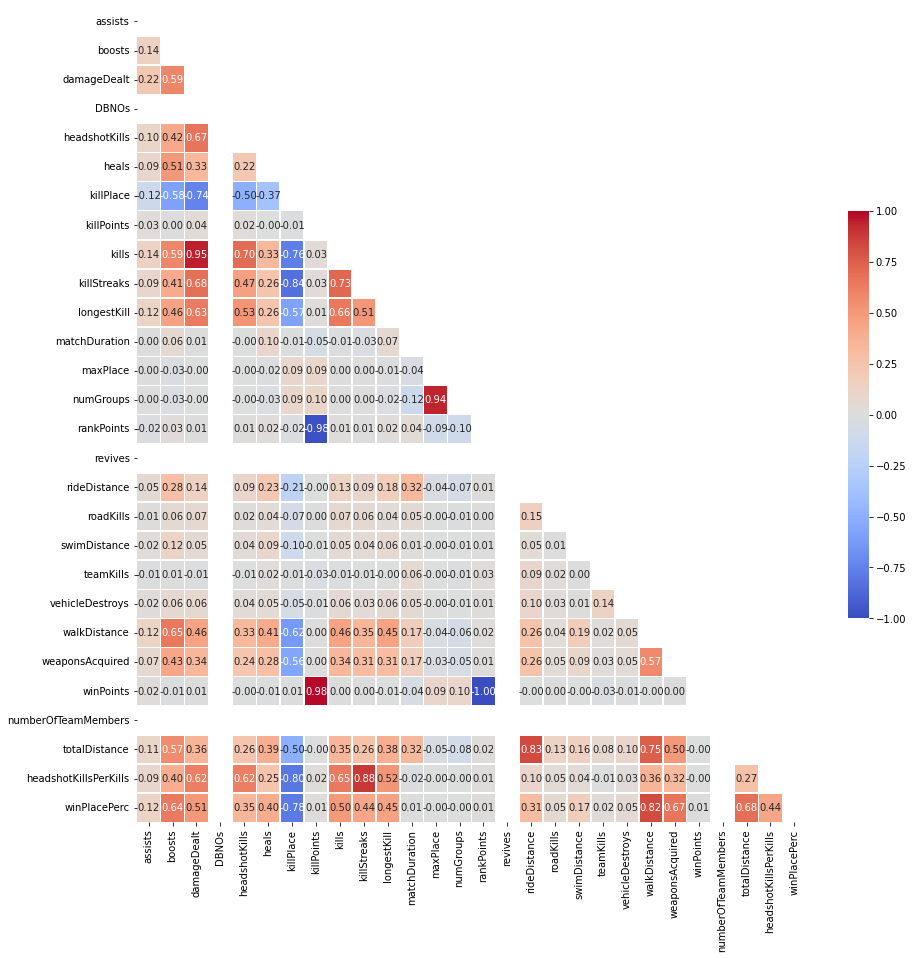

In [ ]:
CorrAnalysis(df_solo_fpp)

### 3-2. 타겟과 상관관계가 높았던 feature들과 타겟 간의 관계 분석

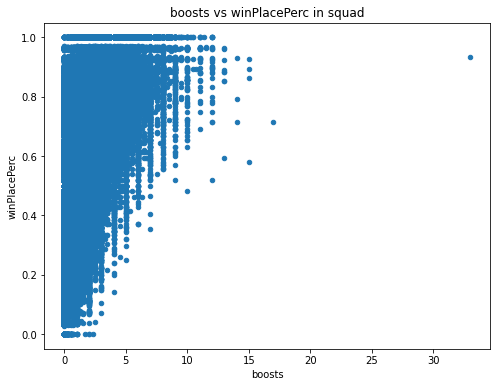

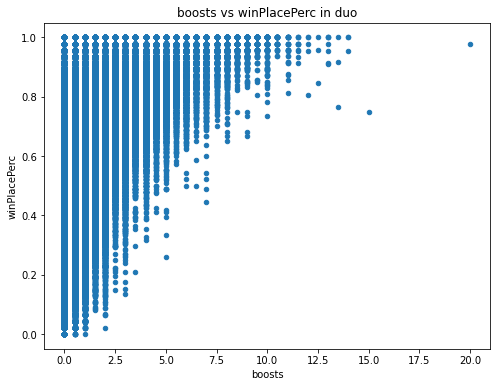

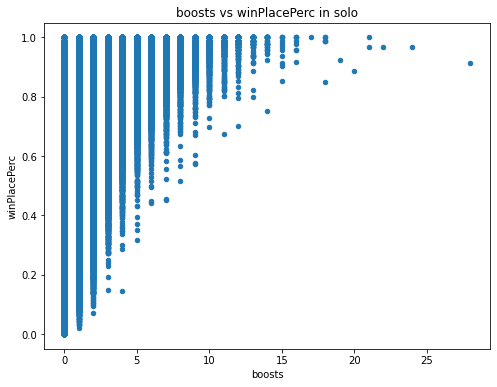

In [ ]:
df_squad_fpp.plot(x="boosts",y="winPlacePerc", kind="scatter", figsize=(8,6), title='boosts vs winPlacePerc in squad')
df_duo_fpp.plot(x="boosts",y="winPlacePerc", kind="scatter", figsize=(8,6), title='boosts vs winPlacePerc in duo')
df_solo_fpp.plot(x="boosts",y="winPlacePerc", kind="scatter", figsize=(8,6), title='boosts vs winPlacePerc in solo')

* 오래 살아남을수록 부스팅 아이템을 계속 사용해야 하니 순위가 높을수록 부스팅 아이템을 많이 사용

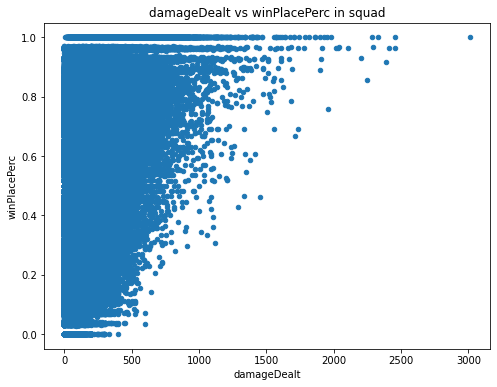

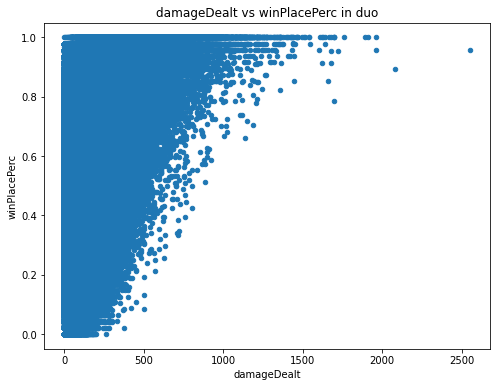

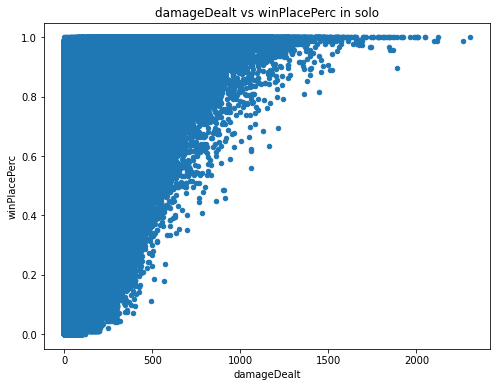

In [ ]:
df_squad_fpp.plot(x="damageDealt",y="winPlacePerc", kind="scatter", figsize=(8,6), title='damageDealt vs winPlacePerc in squad')
df_duo_fpp.plot(x="damageDealt",y="winPlacePerc", kind="scatter", figsize=(8,6), title='damageDealt vs winPlacePerc in duo')
df_solo_fpp.plot(x="damageDealt",y="winPlacePerc", kind="scatter", figsize=(8,6), title='damageDealt vs winPlacePerc in solo')

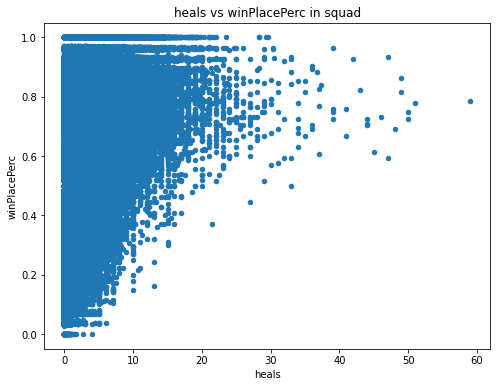

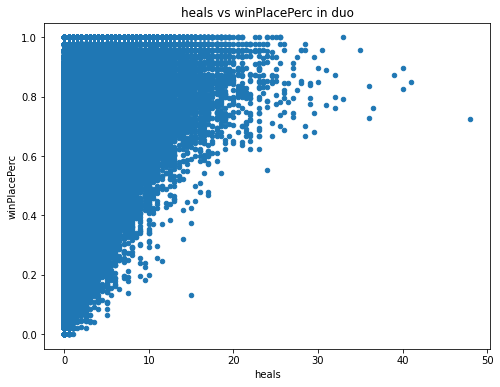

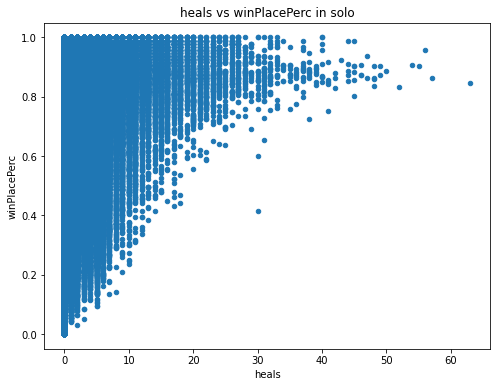

In [ ]:
df_squad_fpp.plot(x="heals",y="winPlacePerc", kind="scatter", figsize=(8,6), title='heals vs winPlacePerc in squad')
df_duo_fpp.plot(x="heals",y="winPlacePerc", kind="scatter", figsize=(8,6), title='heals vs winPlacePerc in duo')
df_solo_fpp.plot(x="heals",y="winPlacePerc", kind="scatter", figsize=(8,6), title='heals vs winPlacePerc in solo')

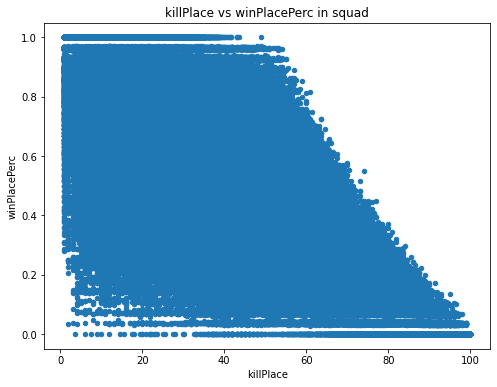

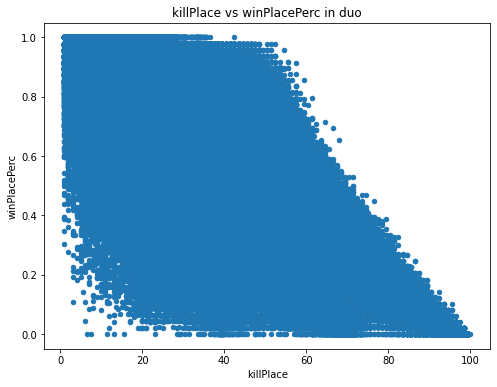

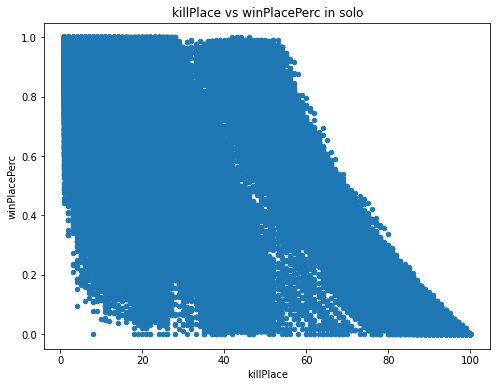

In [ ]:
df_squad_fpp.plot(x="killPlace",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killPlace vs winPlacePerc in squad')
df_duo_fpp.plot(x="killPlace",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killPlace vs winPlacePerc in duo')
df_solo_fpp.plot(x="killPlace",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killPlace vs winPlacePerc in solo')

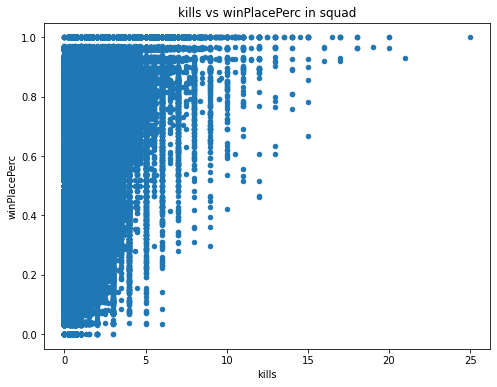

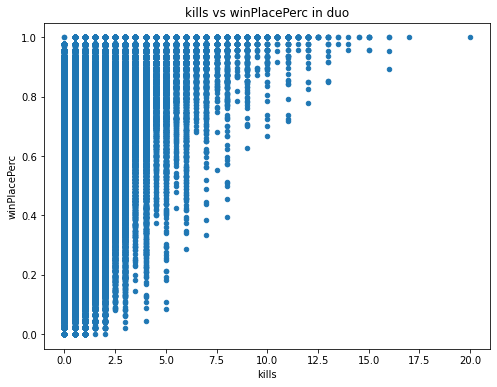

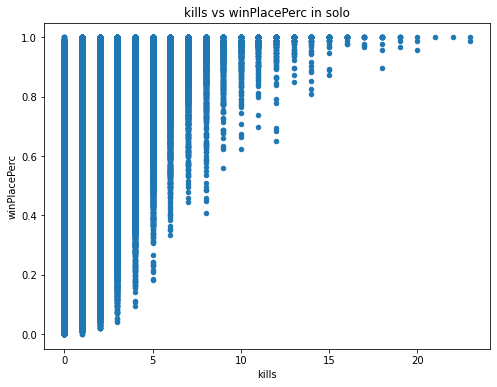

In [ ]:
df_squad_fpp.plot(x="kills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='kills vs winPlacePerc in squad')
df_duo_fpp.plot(x="kills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='kills vs winPlacePerc in duo')
df_solo_fpp.plot(x="kills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='kills vs winPlacePerc in solo')

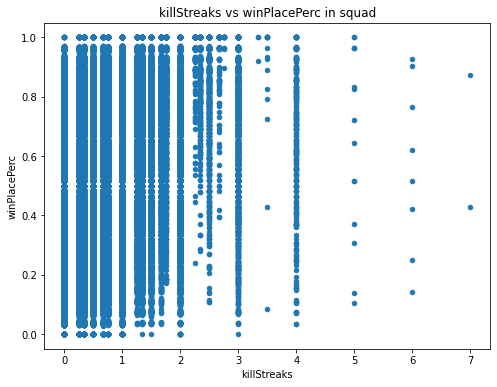

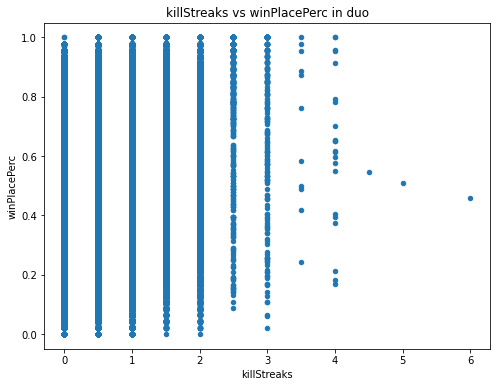

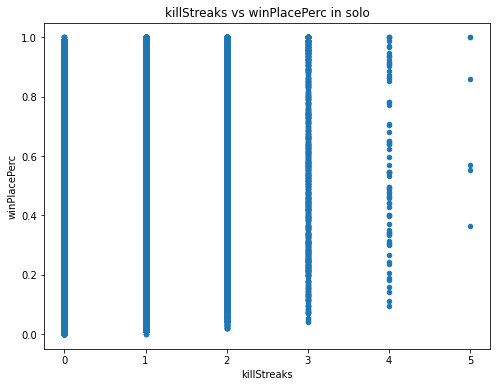

In [ ]:
df_squad_fpp.plot(x="killStreaks",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killStreaks vs winPlacePerc in squad')
df_duo_fpp.plot(x="killStreaks",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killStreaks vs winPlacePerc in duo')
df_solo_fpp.plot(x="killStreaks",y="winPlacePerc", kind="scatter", figsize=(8,6), title='killStreaks vs winPlacePerc in solo')

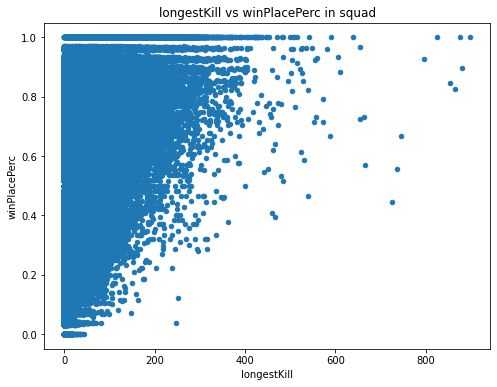

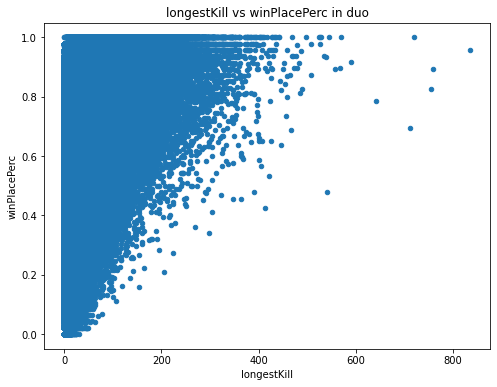

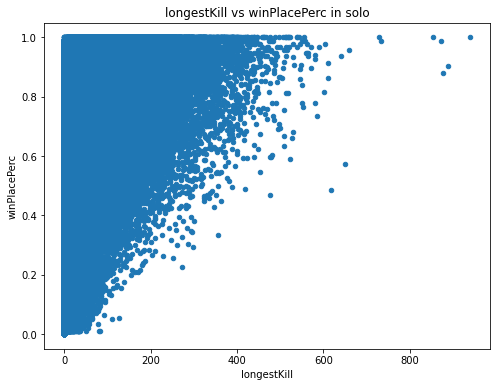

In [ ]:
df_squad_fpp.plot(x="longestKill",y="winPlacePerc", kind="scatter", figsize=(8,6), title='longestKill vs winPlacePerc in squad')
df_duo_fpp.plot(x="longestKill",y="winPlacePerc", kind="scatter", figsize=(8,6), title='longestKill vs winPlacePerc in duo')
df_solo_fpp.plot(x="longestKill",y="winPlacePerc", kind="scatter", figsize=(8,6), title='longestKill vs winPlacePerc in solo')

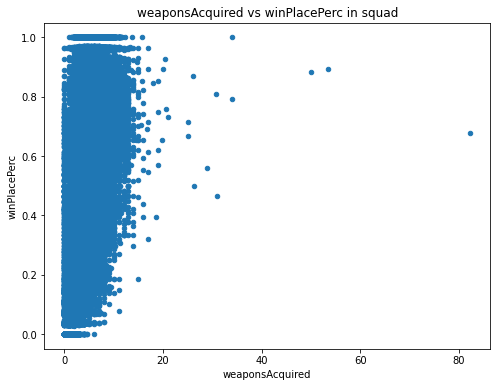

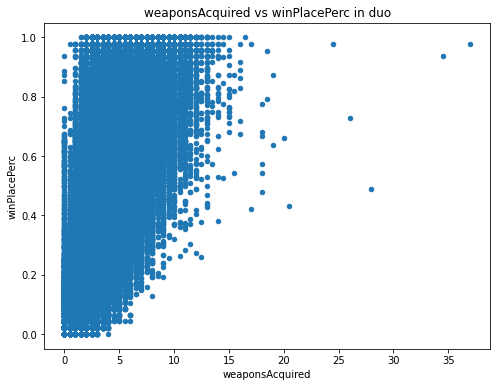

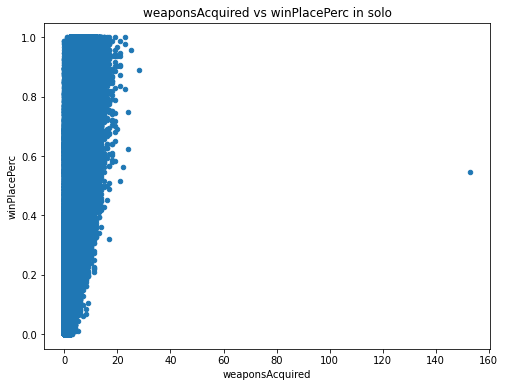

In [ ]:
df_squad_fpp.plot(x="weaponsAcquired",y="winPlacePerc", kind="scatter", figsize=(8,6), title='weaponsAcquired vs winPlacePerc in squad')
df_duo_fpp.plot(x="weaponsAcquired",y="winPlacePerc", kind="scatter", figsize=(8,6), title='weaponsAcquired vs winPlacePerc in duo')
df_solo_fpp.plot(x="weaponsAcquired",y="winPlacePerc", kind="scatter", figsize=(8,6), title='weaponsAcquired vs winPlacePerc in solo')

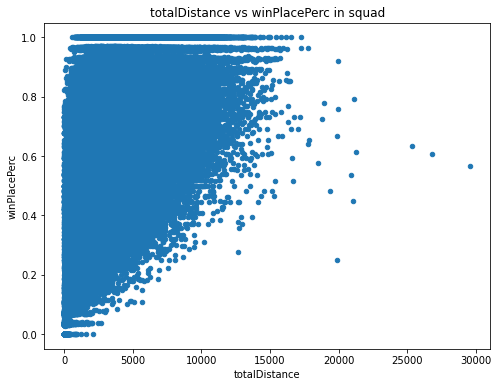

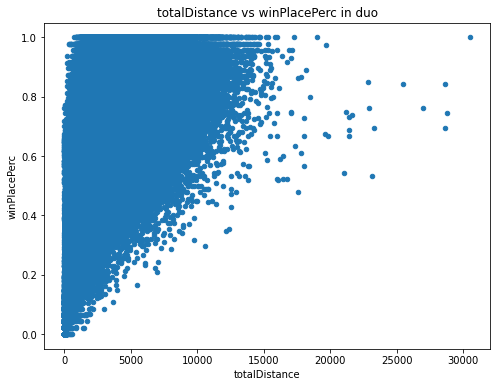

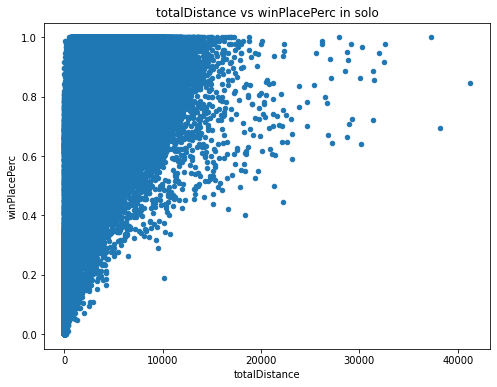

In [ ]:
df_squad_fpp.plot(x="totalDistance",y="winPlacePerc", kind="scatter", figsize=(8,6), title='totalDistance vs winPlacePerc in squad')
df_duo_fpp.plot(x="totalDistance",y="winPlacePerc", kind="scatter", figsize=(8,6), title='totalDistance vs winPlacePerc in duo')
df_solo_fpp.plot(x="totalDistance",y="winPlacePerc", kind="scatter", figsize=(8,6), title='totalDistance vs winPlacePerc in solo')

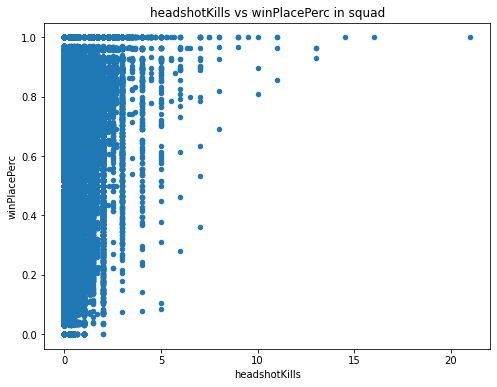

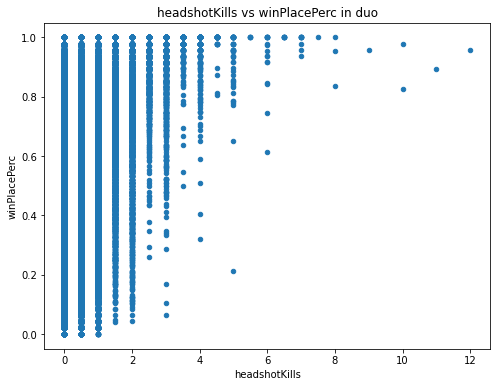

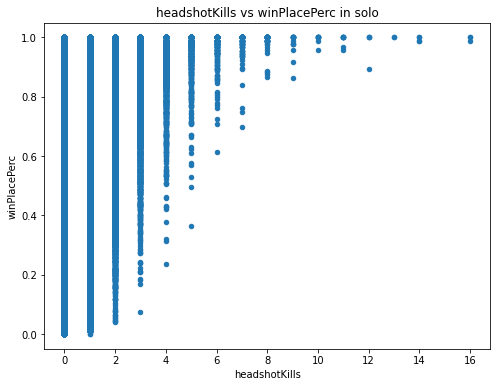

In [ ]:
df_squad_fpp.plot(x="headshotKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKills vs winPlacePerc in squad')
df_duo_fpp.plot(x="headshotKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKills vs winPlacePerc in duo')
df_solo_fpp.plot(x="headshotKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKills vs winPlacePerc in solo')

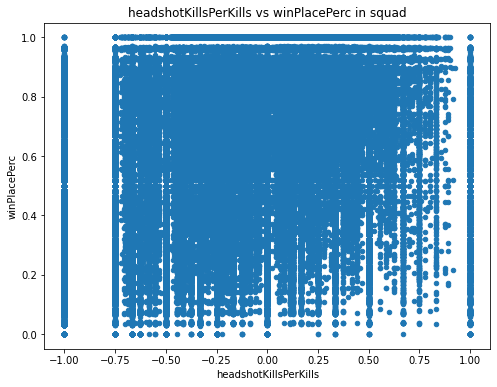

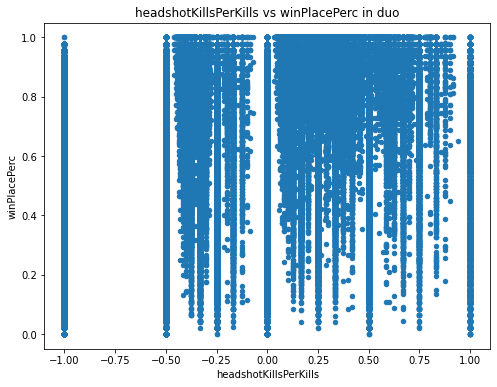

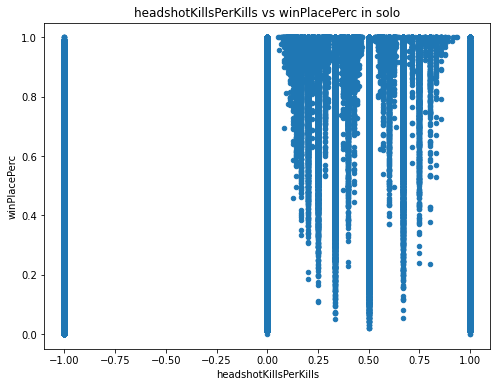

In [ ]:
df_squad_fpp.plot(x="headshotKillsPerKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKillsPerKills vs winPlacePerc in squad')
df_duo_fpp.plot(x="headshotKillsPerKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKillsPerKills vs winPlacePerc in duo')
df_solo_fpp.plot(x="headshotKillsPerKills",y="winPlacePerc", kind="scatter", figsize=(8,6), title='headshotKillsPerKills vs winPlacePerc in solo')

# 4. 모델링

In [ ]:
print('df_squad_fpp:', df_squad_fpp.shape)
print('df_duo_fpp:', df_duo_fpp.shape)
print('df_solo_fpp:', df_solo_fpp.shape)

df_squad_fpp: (426996, 28)
df_duo_fpp: (450262, 28)
df_solo_fpp: (511998, 28)


### 4-1 train data / validation data / test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

def data_divided(df):
  train, test = train_test_split(df, test_size=0.15, random_state=1)
  train, val = train_test_split(train, test_size=0.15, random_state=1)
  return train, val, test

In [ ]:
train_squad, val_squad, test_squad = data_divided(df_squad_fpp)
train_duo, val_duo, test_duo = data_divided(df_duo_fpp)
train_solo, val_solo, test_solo = data_divided(df_solo_fpp)
print('squad:', train_squad.shape, val_squad.shape, test_squad.shape)
print('duo:', train_duo.shape, val_duo.shape, test_duo.shape)
print('solo:', train_solo.shape, val_solo.shape, test_solo.shape)

squad: (308504, 28) (54442, 28) (64050, 28)
duo: (325313, 28) (57409, 28) (67540, 28)
solo: (369918, 28) (65280, 28) (76800, 28)


In [ ]:
def divide_X_y(df):
  target = 'winPlacePerc'
  features = ['boosts', 'damageDealt', 'headshotKills', 'heals',
       'kills', 'longestKill','weaponsAcquired', 'totalDistance']
  
  X = df[features]
  y = df[target]
  return X, y

In [ ]:
X_train_squad, y_train_squad = divide_X_y(train_squad)
X_val_squad, y_val_squad = divide_X_y(val_squad)
X_test_squad, y_test_squad = divide_X_y(test_squad)

X_train_duo, y_train_duo = divide_X_y(train_duo)
X_val_duo, y_val_duo = divide_X_y(val_duo)
X_test_duo, y_test_duo = divide_X_y(test_duo)

X_train_solo, y_train_solo = divide_X_y(train_solo)
X_val_solo, y_val_solo = divide_X_y(val_solo)
X_test_solo, y_test_solo = divide_X_y(test_solo)

In [ ]:
print('squad_train:', X_train_squad.shape, y_train_squad.shape)
print('squad_val:', X_val_squad.shape, y_val_squad.shape)
print('squad_test:', X_test_squad.shape, y_test_squad.shape)

print('duo_train:', X_train_duo.shape, y_train_duo.shape)
print('duo_val:', X_val_duo.shape, y_val_duo.shape)
print('duo_test:', X_test_duo.shape, y_test_duo.shape)

print('solo_train:', X_train_solo.shape, y_train_solo.shape)
print('solo_val:', X_val_solo.shape, y_val_solo.shape)
print('solo_test:', X_test_solo.shape, y_test_solo.shape)

squad_train: (308504, 8) (308504,)
squad_val: (54442, 8) (54442,)
squad_test: (64050, 8) (64050,)
duo_train: (325313, 8) (325313,)
duo_val: (57409, 8) (57409,)
duo_test: (67540, 8) (67540,)
solo_train: (369918, 8) (369918,)
solo_val: (65280, 8) (65280,)
solo_test: (76800, 8) (76800,)


### 4-2 squad 예측(DecisionTree, RandomForest, XGBoost)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt_squad = DecisionTreeRegressor(random_state=1)
dt_squad.fit(X_train_squad, y_train_squad)
dt_squad_pred = dt_squad.predict(X_val_squad)

print(r2_score(y_val_squad, dt_squad_pred))

0.6518036117356765


In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
rf_squad = RandomForestRegressor(random_state=1)
rf_squad.fit(X_train_squad, y_train_squad)
rf_squad_pred = rf_squad.predict(X_val_squad)
print(r2_score(y_val_squad, rf_squad_pred))

0.8216151911734578


In [ ]:
from xgboost import XGBRegressor

xgb_squad = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_squad.fit(X_train_squad, y_train_squad)
xgb_squad_pred = xgb_squad.predict(X_val_squad)
print(r2_score(y_val_squad, xgb_squad_pred))

[15:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.833856526735051


In [ ]:
squad_model = xgb_squad
squad_pred = squad_model.predict(X_test_squad)
print('squad 순위 예측 모델 r2_score:', r2_score(y_test_squad, squad_pred))

squad 순위 예측 모델 r2_score: 0.8305720930359123


### 4-3 duo 예측(DecisionTree, RandomForest, XGBoost)

In [ ]:
dt_duo = DecisionTreeRegressor(random_state=1)
dt_duo.fit(X_train_duo, y_train_duo)
dt_duo_pred = dt_duo.predict(X_val_duo)

print(r2_score(y_val_duo, dt_duo_pred))

0.737621764756289


In [ ]:
rf_duo = RandomForestRegressor(random_state=1)
rf_duo.fit(X_train_duo, y_train_duo)
rf_duo_pred = rf_duo.predict(X_val_duo)
print(r2_score(y_val_duo, rf_duo_pred))

0.8604897327644146


In [ ]:
xgb_duo = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_duo.fit(X_train_duo, y_train_duo)
xgb_duo_pred = xgb_duo.predict(X_val_duo)
print(r2_score(y_val_duo, xgb_duo_pred))

[15:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8724056025569161


In [ ]:
duo_model = xgb_duo
duo_pred = duo_model.predict(X_test_duo)
print('duo 순위 예측 모델 r2_score:', r2_score(y_test_duo, duo_pred))

duo 순위 예측 모델 r2_score: 0.874836224414199


### 4-4 solo 예측(DecisionTree, RandomForest, XGBoost)

In [ ]:
dt_solo = DecisionTreeRegressor(random_state=1)
dt_solo.fit(X_train_solo, y_train_solo)
dt_solo_pred = dt_solo.predict(X_val_solo)

print(r2_score(y_val_solo, dt_solo_pred))

0.7509780581691372


In [ ]:
rf_solo = RandomForestRegressor(random_state=1)
rf_solo.fit(X_train_solo, y_train_solo)
rf_solo_pred = rf_solo.predict(X_val_solo)

print(r2_score(y_val_solo, rf_solo_pred))

0.8563540620089194


In [ ]:
xgb_solo = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_solo.fit(X_train_solo, y_train_solo)
xgb_solo_pred = xgb_solo.predict(X_val_solo)

print(r2_score(y_val_solo, xgb_solo_pred))

[16:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8764283850432116


In [ ]:
solo_model = xgb_solo
solo_pred = solo_model.predict(X_test_solo)
print('solo 순위 예측 모델 r2_score:', r2_score(y_test_solo, solo_pred))

solo 순위 예측 모델 r2_score: 0.8761894413629817


###4-5 squad 모델 해석

In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

permuter_squad = PermutationImportance(
    squad_model,
    scoring = 'r2',
    n_iter = 10,
    random_state = 2
)

permuter_squad.fit(X_test_squad, y_test_squad)

squad_fi = pd.DataFrame({'feature' : X_test_squad.columns,
                   'importance' : permuter_squad.feature_importances_}).sort_values('importance', ascending = True)

squad_fi

,feature,importance
2,headshotKills,0.002215
3,heals,0.008186
1,damageDealt,0.008462
4,kills,0.010877
6,weaponsAcquired,0.012926
5,longestKill,0.013367
0,boosts,0.101781
7,totalDistance,0.715999


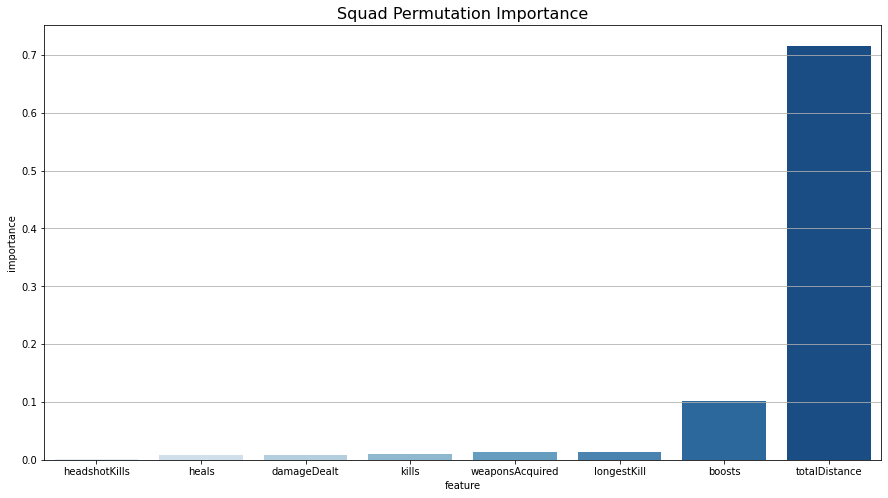

In [ ]:
# 시각화를 통해 확인

plt.figure(figsize = (15, 8))
sns.barplot(x = 'feature', y = 'importance', data = squad_fi, palette = 'Blues')

plt.title('Squad Permutation Importance', fontdict = {'fontsize' : 16})
plt.grid(True, axis = 'y')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4d87fb10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4d87f5d0>})

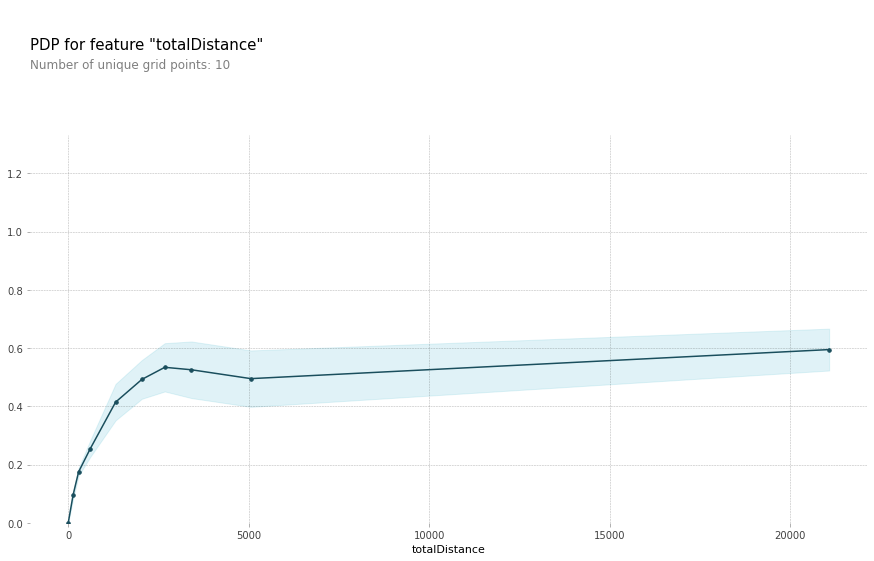

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

squad_totalDistance = pdp_isolate(
    model = squad_model,
    dataset = X_test_squad,
    model_features = X_test_squad.columns,
    feature = 'totalDistance',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(squad_totalDistance, feature_name = 'totalDistance')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e267310>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e2ba550>})

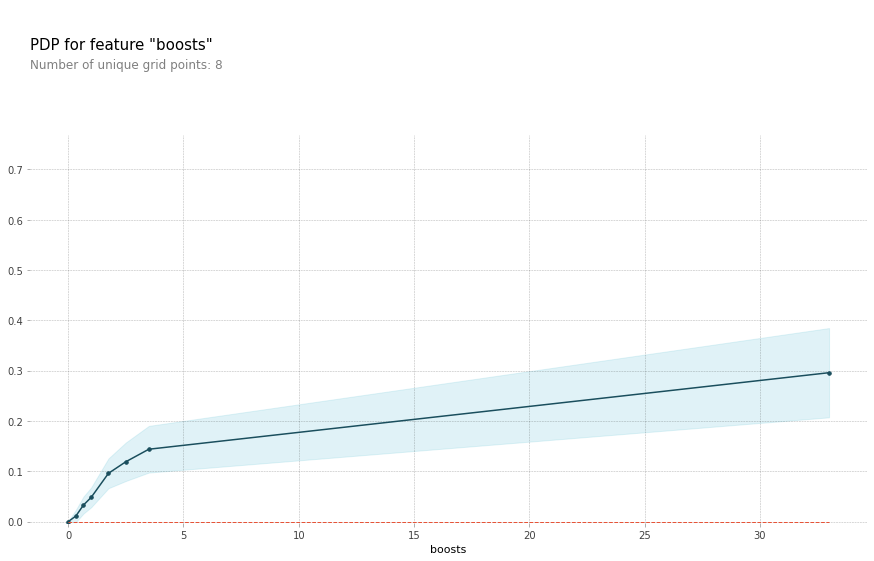

In [ ]:
squad_boosts = pdp_isolate(
    model = squad_model,
    dataset = X_test_squad,
    model_features = X_test_squad.columns,
    feature = 'boosts',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(squad_boosts, feature_name = 'boosts')

#### duo 모델 해석

In [ ]:
permuter_duo = PermutationImportance(
    duo_model,
    scoring = 'r2',
    n_iter = 10,
    random_state = 2
)

permuter_duo.fit(X_test_duo, y_test_duo)

duo_fi = pd.DataFrame({'feature' : X_test_duo.columns,
                   'importance' : permuter_duo.feature_importances_}).sort_values('importance', ascending = True)

duo_fi

,feature,importance
2,headshotKills,0.000446
3,heals,0.006745
1,damageDealt,0.007752
4,kills,0.007869
5,longestKill,0.011931
6,weaponsAcquired,0.027134
0,boosts,0.064180
7,totalDistance,0.757807


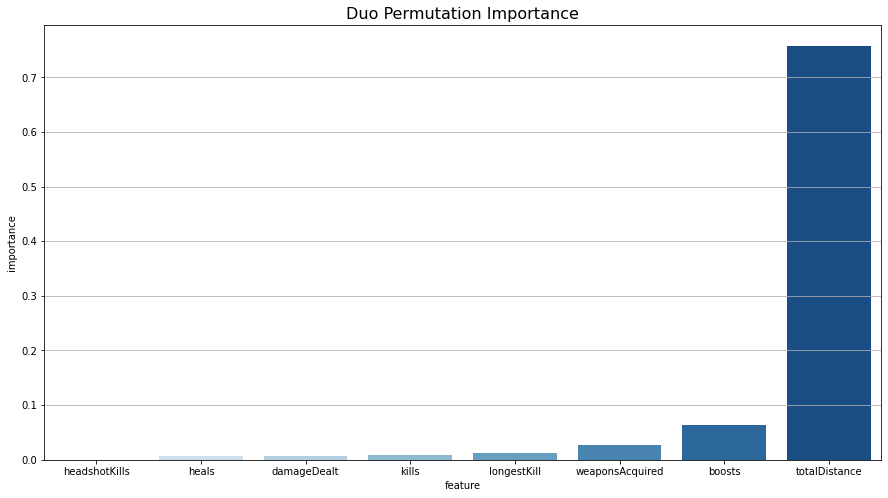

In [ ]:
# 시각화를 통해 확인

plt.figure(figsize = (15, 8))
sns.barplot(x = 'feature', y = 'importance', data = duo_fi, palette = 'Blues')

plt.title('Duo Permutation Importance', fontdict = {'fontsize' : 16})
plt.grid(True, axis = 'y')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e0fb790>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4e177950>})

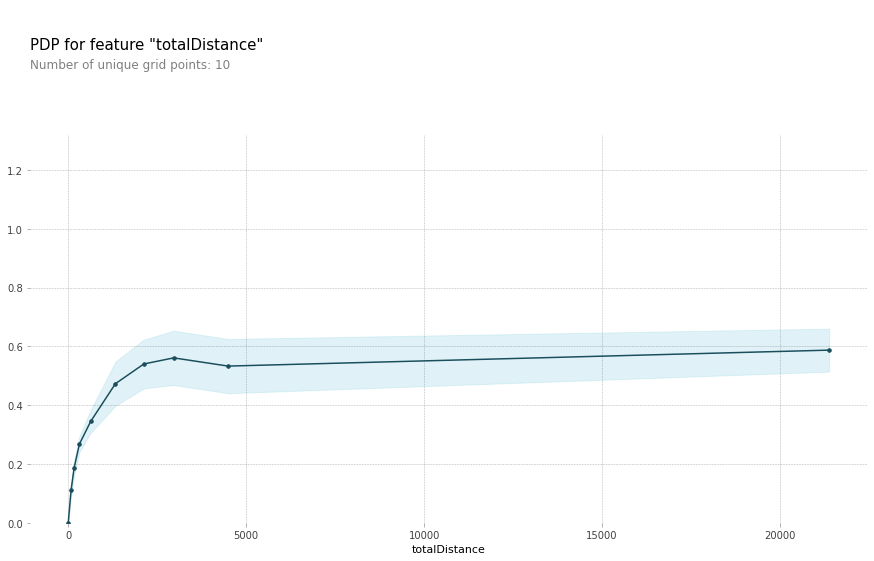

In [ ]:
duo_totalDistance = pdp_isolate(
    model = duo_model,
    dataset = X_test_duo,
    model_features = X_test_duo.columns,
    feature = 'totalDistance',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(duo_totalDistance, feature_name = 'totalDistance')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4dcf7810>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f3b4ddc5490>})

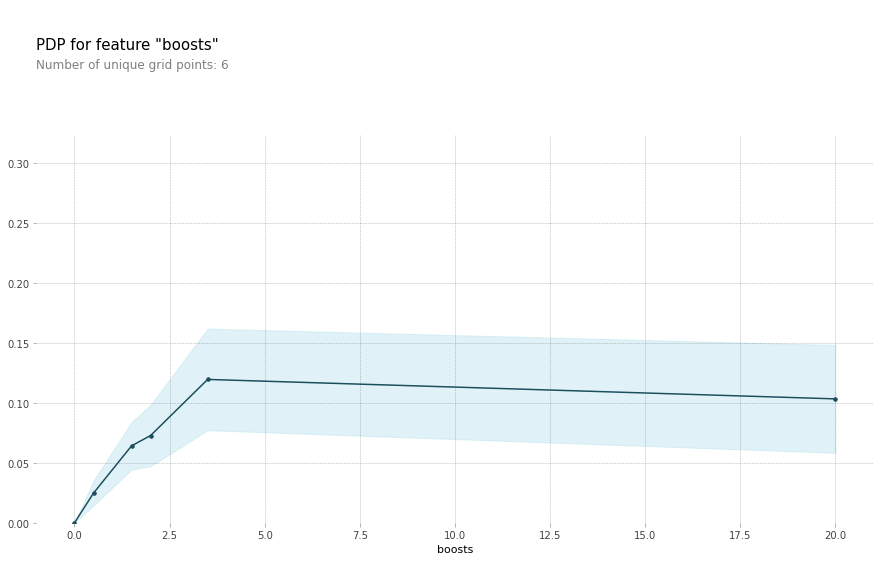

In [ ]:
duo_boosts = pdp_isolate(
    model = duo_model,
    dataset = X_test_duo,
    model_features = X_test_duo.columns,
    feature = 'boosts',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(duo_boosts, feature_name = 'boosts')

#### solo 모델 해석

In [ ]:
permuter_solo = PermutationImportance(
    solo_model,
    scoring = 'r2',
    n_iter = 10,
    random_state = 2
)

permuter_solo.fit(X_test_solo, y_test_solo)

solo_fi = pd.DataFrame({'feature' : X_test_solo.columns,
                   'importance' : permuter_solo.feature_importances_}).sort_values('importance', ascending = True)

solo_fi

,feature,importance
2,headshotKills,0.000019
4,kills,0.001066
5,longestKill,0.009684
1,damageDealt,0.010418
3,heals,0.011155
6,weaponsAcquired,0.035952
0,boosts,0.080200
7,totalDistance,0.777366


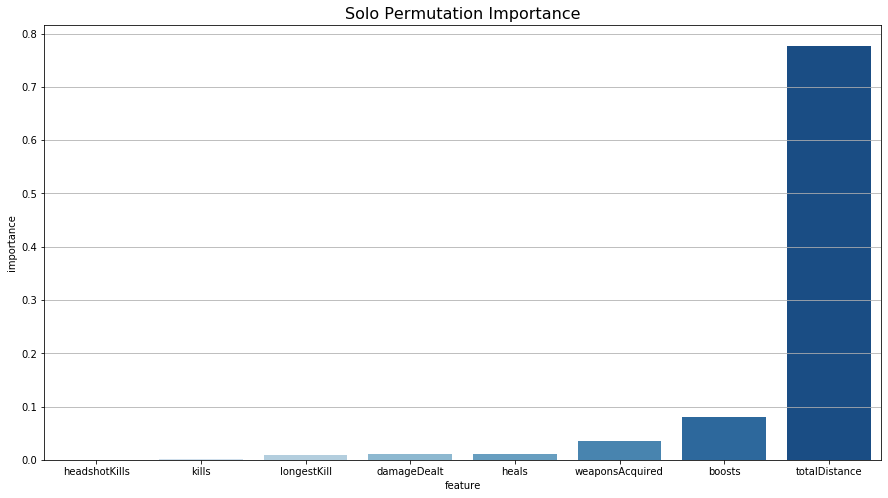

In [ ]:
# 시각화를 통해 확인
plt.figure(figsize = (15, 8))
sns.barplot(x = 'feature', y = 'importance', data = solo_fi, palette = 'Blues')

plt.title('Solo Permutation Importance', fontdict = {'fontsize' : 16})
plt.grid(True, axis = 'y')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad2194410>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1db46d0>})

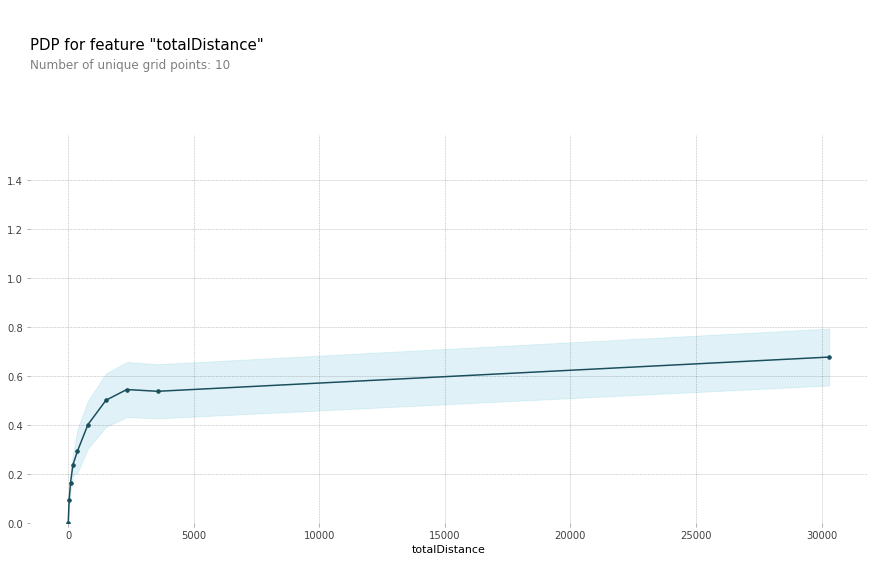

In [ ]:
solo_totalDistance = pdp_isolate(
    model = solo_model,
    dataset = X_test_solo,
    model_features = X_test_solo.columns,
    feature = 'totalDistance',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(solo_totalDistance, feature_name = 'totalDistance')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1ce1290>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1d4ea50>})

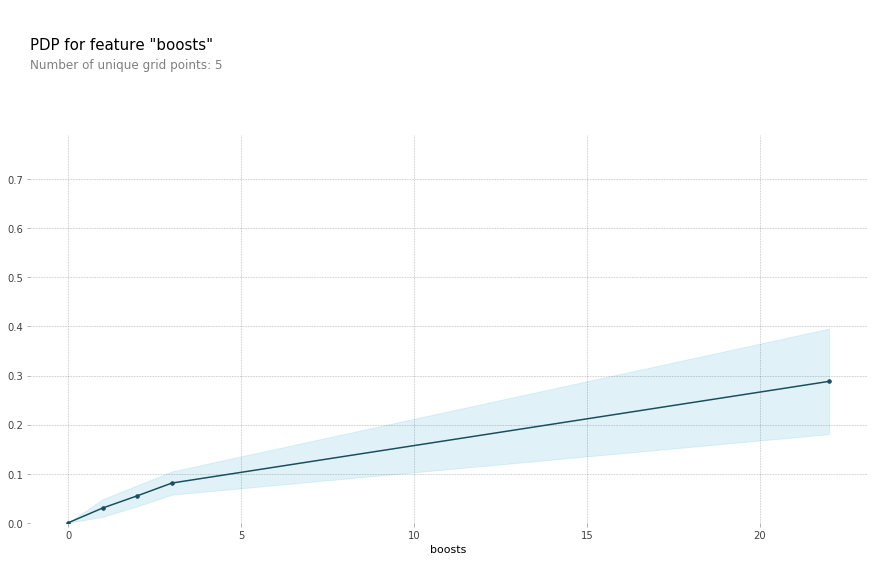

In [ ]:
solo_boosts = pdp_isolate(
    model = solo_model,
    dataset = X_test_solo,
    model_features = X_test_solo.columns,
    feature = 'boosts',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(solo_boosts, feature_name = 'boosts')